**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho


Grupo (Gabriel Olímpio Rocha Leão, Geovanny Magalhães Novais)

---


Analista de dados: Geovanny Magalhães Novais

---

Engenheiro(a) do conhecimento: Gabriel Olímpio Rocha Leão

---

* Montando o drive no colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
novosDados = pd.read_csv('/content/drive/MyDrive/1_Colaboratory/incerteza/dtCoracao.csv')

* Importando as bibliotecas usadas:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

* Separando os dados em um conjunto de valores e uma lista de classificação

In [ ]:
X = novosDados.iloc[:, 0:-1].values.tolist()
Y = np.array(novosDados.iloc[:, -1].values.tolist()).flatten()

* Separando os dados em cojuntos de teste e treinamento
* Onde optamos por 70% para o conjunto de treinamento e 30% para o conjunto de teste

In [ ]:
TreinoX, TesteX, TreinoY, TesteY = train_test_split(X, Y, test_size=0.3, random_state = np.random.RandomState(0)) 

* Instânciando a Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()

* Ajustando os parâmetros

In [ ]:
gnb.fit(TreinoX, TreinoY)

GaussianNB()

* Atributos da Guassian Naive Bayes depois de treinada


* Probabilidade de cada classe

In [ ]:
print(gnb.class_prior_)

[0.62857143 0.37142857]


* Número de exemplos de treinamento observado em cada classe

In [ ]:
print(gnb.class_count_)

* Média de cada atributo por classe

In [ ]:
print('Classe dos sobreviventes:\n', gnb.theta_[0])
print('Classe dos não sobreviventes:\n', gnb.theta_[1])

* Variância de cada atributo por classe

In [ ]:
print('Classe dos sobreviventes:\n', gnb.sigma_[0])
print('Classe dos não sobreviventes:\n', gnb.sigma_[1])

* Valor aditivo absoluto às variações

In [ ]:
print(gnb.epsilon_)

* Calculando a média da acurácia dado um conjunto de dados de teste

In [ ]:
print("Acurácia: ", round(gnb.score(TesteX, TesteY)*100, 2), "%")

* Fazendo a classificação de um conjunto de dados de teste

In [ ]:
predicoesGaussianas = gnb.predict(TesteX)

* Para auxiliar os dados de predição iremos utilizar essa 
função para plotar a matriz de confusão 

In [ ]:
def plot_confusion_matrix(cm):
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    ax.set(ylabel='Valor verdadeiro')
    ax.set(xlabel='Valor previsto')
    labels = ['Verdadeiro Negativo', 
              'Falso Positivo', 
              'Falso Negativo', 
              'Verdadeiro Positivo']
    ax.set(yticklabels=['Negativo','Positivo'])
    ax.set(xticklabels=['Negativo','Positivo'])

    count = 0
    bacc = []
    for idx, text in enumerate(ax.texts):
        label = int(text.get_text())
        count += label
        bacc.append(label)

    acc1 = bacc[0] / ( bacc[0] + bacc[2] )
    acc2 = bacc[3] / ( bacc[1] + bacc[3] ) 
    balanced_accuracy = ( acc1 + acc2 ) / 2
    for idx,text in enumerate(ax.texts):
        square = text.get_text()
        percent = int(text.get_text()) / count
        percent = "{0:.0%}".format(percent)
        box_text = "{0}: \n \n {1} \n \n {2}".format(labels[idx], square, percent)
        text.set_text(box_text)
    ax.set_title('Matriz de Confusão')

* Plotando a matriz de confusão

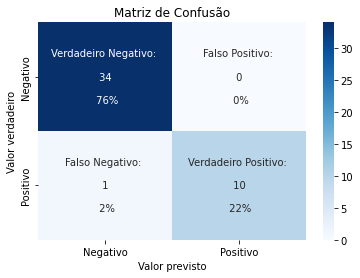

In [ ]:
cm = confusion_matrix(TesteY, predicoesGaussianas)
plot_confusion_matrix(cm)

* Calculando a acurácia total dado a matriz de confusão

In [ ]:
valor = ( cm[0][0] + cm[1][1] ) / ( cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
valor = "{0:.0%}".format(valor)
print('Acurácia total encontrada =', valor)

Acurácia total encontrada = 98%


* Calculando a acurácia de falso positivo/verdadeiro positivo dado a matriz de confusão

In [ ]:
valor = ( cm[1][1] ) / ( cm[0][1] + cm[1][1]) 
valor = "{0:.0%}".format(valor)
print('Acurácia de distinção entre Falso positivo / Verdadeiro positivo :\n', valor )

Acurácia de distinção entre Falso positivo / Verdadeiro positivo :
 100%


* Calculando a acurácia de falso negativo/verdadeiro negativo dado a matriz de confusão

In [ ]:
valor = ( cm[0][0] ) / ( cm[1][0] + cm[0][0]) 
valor = "{0:.0%}".format(valor)
print('Acurácia de distinção entre Falso negativo / Verdadeiro negativo :\n', valor )

Acurácia de distinção entre Falso negativo / Verdadeiro negativo :
 97%
